# Multi Armed Bandit Problem







## Context

For this task, I designed a solution for the n-armed bandit problem, where n could be 5, 10, 20 (or any real integer value). We designed a solution that can be replicated for any sized n value, initially using basic functions and later using object oriented programming such that the agent could record it's own state history, which made it easier for us to compare the results across different values of n.

## Libraries

The two libraries I used for this assignment were Numpy and Matplotlib.

In [ ]:
# Let's start by importing our libraries

import numpy as np
import matplotlib.pyplot as plt

# We'll also set a global random seed so that our results are reproducible when the entire notebook is run.
np.random.seed(42)

# Note that re-running random elements individually in this notebook will produce novel results, since the pseudo-random state will have progressed.
# To repeat the exact results from our report, ensure that the entire notebook is run from start to finish.

## Setting up the Multi-Armed Bandit Problem

In [ ]:
# Here is our function to randomly create 'n' distinct expected values, in a range from -1 to 1
def generate_expected_values(n):
    possible_values = np.arange(-n, n) # Give us a list of values between n and -n
    np.random.shuffle(possible_values) # Randomly order the possible values
    expected_values = possible_values[:n] / n  # We then slice the number of values required and divide by n, to normalise our values between -1 and 1
    return expected_values

# Here, is our function to create 'n' standard deviation values, in a range from 0 to 1.
def generate_std_values(n):
    possible_values = np.arange(0, 2*n)
    np.random.shuffle(possible_values)
    std_values = possible_values[:n] / (2*n)
    return std_values


In [ ]:
# Using these two functions, we can define arrays of our expected values and our std values for our n-armed bandits and the associated distributions (where n could be any integer)

# 5 armed bandit
n5 = generate_expected_values(5)
n5_std = generate_std_values(5)

# 10 armed bandit
n10 = generate_expected_values(10)
n10_std = generate_std_values(10)

# 20 armed bandit
n20 = generate_expected_values(20)
n20_std = generate_std_values(20)

print("5 Armed Bandit Details:")
print("Expected Values:\n", n5)
print("Standard Deviations:\n",n5_std)
print()

print("10 Armed Bandit Details:")
print("Expected Values:\n", n10)
print("Standard Deviations:\n",n10_std)
print()

print("20 Armed Bandit Details:")
print("Expected Values:\n", n20)
print("Standard Deviations:\n",n20_std)
print()

5 Armed Bandit Details:
Expected Values:
 [ 0.6 -0.8  0.  -1.   0.4]
Standard Deviations:
 [0.  0.1 0.8 0.5 0.3]

10 Armed Bandit Details:
Expected Values:
 [-0.3  0.3  0.  -0.7  0.6 -0.4 -0.8  0.2 -0.2  0.7]
Standard Deviations:
 [0.95 0.5  0.35 0.6  0.45 0.25 0.85 0.   0.15 0.05]

20 Armed Bandit Details:
Expected Values:
 [-0.9  -1.    0.3   0.1  -0.4   0.9  -0.5  -0.1  -0.8   0.6  -0.6   0.
  0.8   0.45 -0.25 -0.3   0.65  0.15  0.2   0.85]
Standard Deviations:
 [0.325 0.975 0.3   0.65  0.5   0.125 0.075 0.725 0.525 0.375 0.95  0.425
 0.55  0.025 0.775 0.625 0.675 0.475 0.85  0.875]



### Defining our Reward Function

For the sake of our experiments, we say that the rewards of each bandit will follow a normal distribution with a standard deviation of 5.

We can generate a value from this distribution using the NumPy random.normal function: https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html

In [ ]:
def calculate_reward(expected_values, std_values, action):
  return np.random.normal(expected_values[action], std_values[action])

## Epsilon Greedy Algorithm
Let's begin by exploring the implementation of a classical greedy-epsilon algorithm.

For this implementation, we asssume that the expectedValues and the epsilon value will be set as hyperparameters. We have already defined our expectedValues above, so we'll define our epsilon values here:

In [ ]:
epsilons = [0.0, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4]

### Greedy Algorithm - State

For the purposes of developing and evaluating an Epsilon Greedy (EG) algorithm, we need to be able to track a number of historical conditions about the state of the world / environment and of the agent.

This includes:

* Number of arms
* Total Rewards
* Sum of rewards per arm
* Count for each arm
* Selections History for each play
* Average rewards for each play

We can do this by initialising a dictionary which describes the state of the agent at any play step:

In [ ]:
def initialise_state(expected_values):
    n_arms = np.size(expected_values)
    state = {
        "n_arms": n_arms,
        "total_reward": 0,
        "sum_rewards": np.zeros(n_arms, dtype=float),
        "counts": np.zeros(n_arms, dtype=int),
        "selections_history": [],
        "average_rewards": []
    }
    return state

### Epsilon Greedy Algorithm - Action Selection

We then define a function by which the agent will be able to use it's state information and a given epsilon value to choose an arm / action.

In [ ]:
def select_arm_eg(state, epsilon):
    if np.random.random() < epsilon or len(state["average_rewards"]) == 0: #len(state["average_rewards"]) applies only on the first play of the agent.
        return np.random.choice(state["n_arms"])
    else:
        avg_rewards = np.divide(state["sum_rewards"], state["counts"], out=np.zeros_like(state["sum_rewards"]), where=state["counts"]!=0)
        return np.argmax(avg_rewards)

### Epsilon Greedy Algorithm - Get Reward

In [ ]:
# Next, we need a function that returns a reward value from the normal distribution, as defined earlier.

def get_reward(expected_values, std_values, arm):
    return np.random.normal(expected_values[arm], std_values[arm])

### Epsilon Greedy Algorithm - Updating our state

Finally, we can write a function to update the state of our agent.

In [ ]:
def update(state, chosen_arm, reward):
    state["counts"][chosen_arm] += 1
    state["sum_rewards"][chosen_arm] += reward
    state["total_reward"] += reward
    state["average_rewards"].append(state["total_reward"] / sum(state["counts"]))
    state["selections_history"].append(np.copy(state["counts"]))
    return state

### Epsilon Greedy Algorithm - Example Usage

In [ ]:
state = initialise_state(n5)
expected_values = n5
std_values = n5_std
epsilon = 0.1

print(f"The initial state of the agent is:\n{state}\n")

chosen_arm = select_arm_eg(state, epsilon)

print(f"The first arm / action chosen is: Arm No. {chosen_arm}")

reward = get_reward(expected_values, std_values, chosen_arm)

print(f"The reward from this action is: {reward}\n")

state = update(state, chosen_arm, reward)

print(f"The new state of the agent is:\n{state}\n")

chosen_arm = select_arm_eg(state, epsilon)

print(f"The second arm / action chosen is: Arm No. {chosen_arm}")

reward = get_reward(expected_values, std_values, chosen_arm)

print(f"The reward from this action is: {reward}\n")

state = update(state, chosen_arm, reward)

print(f"The new state of the agent is:\n{state}")

The initial state of the agent is:
{'n_arms': 5, 'total_reward': 0, 'sum_rewards': array([0., 0., 0., 0., 0.]), 'counts': array([0, 0, 0, 0, 0]), 'selections_history': [], 'average_rewards': []}

The first arm / action chosen is: Arm No. 2
The reward from this action is: 0.28911648440673116

The new state of the agent is:
{'n_arms': 5, 'total_reward': 0.28911648440673116, 'sum_rewards': array([0.        , 0.        , 0.28911648, 0.        , 0.        ]), 'counts': array([0, 0, 1, 0, 0]), 'selections_history': [array([0, 0, 1, 0, 0])], 'average_rewards': [0.28911648440673116]}

The second arm / action chosen is: Arm No. 2
The reward from this action is: 1.2304292531727754

The new state of the agent is:
{'n_arms': 5, 'total_reward': 1.5195457375795065, 'sum_rewards': array([0.        , 0.        , 1.51954574, 0.        , 0.        ]), 'counts': array([0, 0, 2, 0, 0]), 'selections_history': [array([0, 0, 1, 0, 0]), array([0, 0, 2, 0, 0])], 'average_rewards': [0.28911648440673116, 0.75977

### Implementation using Object Oriented Programming

Given that we need to implement our epsilon greedy search algorithm across a range of different epsilon values, and a variety of different Multi-armed-bandit simulations, it makes sense for us to implement our state dictionary and functions as properties and methods of an object, such that we can initialise a new instance of the Epsilon Greedy Object for each variation of the simulation.

This can be done as following:

In [ ]:
class EpsilonGreedy:
    def __init__(self, expectedValues, std_values, epsilon):
        self.expectedValues = expectedValues # Store expected values of each arm
        self.std_values = std_values # Store the std of each arm
        self.epsilon = epsilon #Store the value of epsilon (exploration threshold)
        self.n_arms = np.size(expectedValues) # Check the number of arms
        self.total_reward = 0 # Track the total reward of the agent
        self.sum_rewards = np.zeros(self.n_arms, dtype=float) # Initialise array to store the total rewards for each arm
        self.counts = np.zeros(self.n_arms, dtype=int) # Initialise an array to count the number of times each arm has been used

        self.average_rewards = []  # Initialise an array to store the average reward after each step (used for plotting the average reward graph)
        self.selections_history = [] # Initialise an array to track the history of selections for each arm (used for plotting the optimal action graph)

    def select_arm(self):
        if np.random.random() < self.epsilon or len(self.average_rewards) == 0:
            chosen_arm = np.random.choice(self.n_arms)
            return chosen_arm
        else:
            avg_rewards = np.divide(self.sum_rewards, self.counts, out=np.zeros_like(self.sum_rewards), where=self.counts!=0)
            return np.argmax(avg_rewards)

    def get_reward(self, chosen_arm):
        return np.random.normal(self.expectedValues[chosen_arm], self.std_values[chosen_arm])

    def update(self, chosen_arm, reward):
        self.counts[chosen_arm] += 1
        self.sum_rewards[chosen_arm] += reward
        self.total_reward += reward
        self.average_rewards.append(self.total_reward / sum(self.counts))
        self.selections_history.append(np.copy(self.counts))

### Running our Experiment (Epsilon-Greedy)

Now that we've defined our Epsilon Greedy algorithm as a class, which takes arguments of expected values and an epsilon value, we can instantiate an epsilon greedy simulation for each of the values of epsilon and for each variation of the multi-armed bandit simulation (for different values of n). This enables us to easily graph the results across all instances.

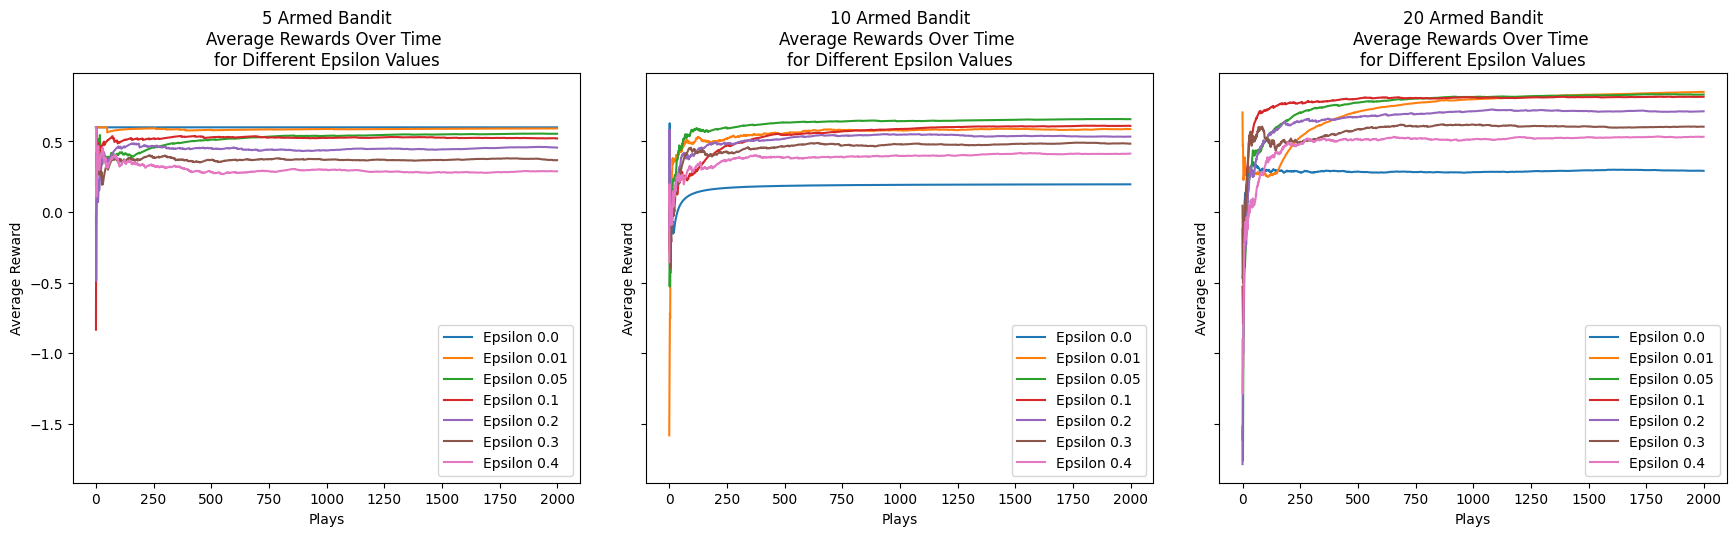

In [ ]:
# Set the total number of plays or trials for each simulation
totalPlays = 2000

# Define a list of epsilon values for exploring/exploiting in the Epsilon-Greedy strategy
epsilons = [0.0, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4]

# Create instances of the EpsilonGreedy class for a 5-armed bandit problem with different epsilon values
n5_eg_instances = [EpsilonGreedy(n5, n5_std, eps) for eps in epsilons]

# Create instances of the EpsilonGreedy class for a 10-armed bandit problem with different epsilon values
n10_eg_instances = [EpsilonGreedy(n10, n10_std, eps) for eps in epsilons]

# Create instances of the EpsilonGreedy class for a 20-armed bandit problem with different epsilon values
n20_eg_instances = [EpsilonGreedy(n20, n20_std, eps) for eps in epsilons]

# Group the instances of the EpsilonGreedy simulations by the number of arms (5, 10, 20)
eg_instances = [n5_eg_instances, n10_eg_instances, n20_eg_instances]

# Run the simulation for each set of instances (for each group of n-armed bandit problems)
for instance_set in eg_instances:
  for eg in instance_set:
      # For each instance, simulate the total number of plays
      for i in range(totalPlays):
          # Select an arm based on the Epsilon-Greedy strategy
          chosen_arm = eg.select_arm()
          # Get the reward for the chosen arm
          reward = eg.get_reward(chosen_arm)
          # Update the state based on the chosen arm and obtained reward
          eg.update(chosen_arm, reward)

# Set up the plotting environment with 3 subplots (one for each n-armed bandit setup) in a single row
fig, axs = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Define titles for each subplot corresponding to different n-armed bandit problems
titles = ['5 Armed Bandit', '10 Armed Bandit', '20 Armed Bandit']

# Define additional context to append to each title
graph_context = "\nAverage Rewards Over Time \nfor Different Epsilon Values"

# Plot the results for each set of instances
for ax, instance_set, title in zip(axs, eg_instances, titles):
    # For each EpsilonGreedy instance in the set, plot the average rewards over time
    for i, eg in enumerate(instance_set):
        ax.plot(eg.average_rewards, label=f'Epsilon {epsilons[i]}')
    # Set the title, labels, and legend for each subplot
    ax.set_title(title + graph_context)
    ax.set_xlabel('Plays')
    ax.set_ylabel('Average Reward')
    ax.legend()

# Adjust the layout to make sure everything fits without overlapping
plt.tight_layout(pad=3)

# Display the plot
plt.show()


### Optimal Action Percentages

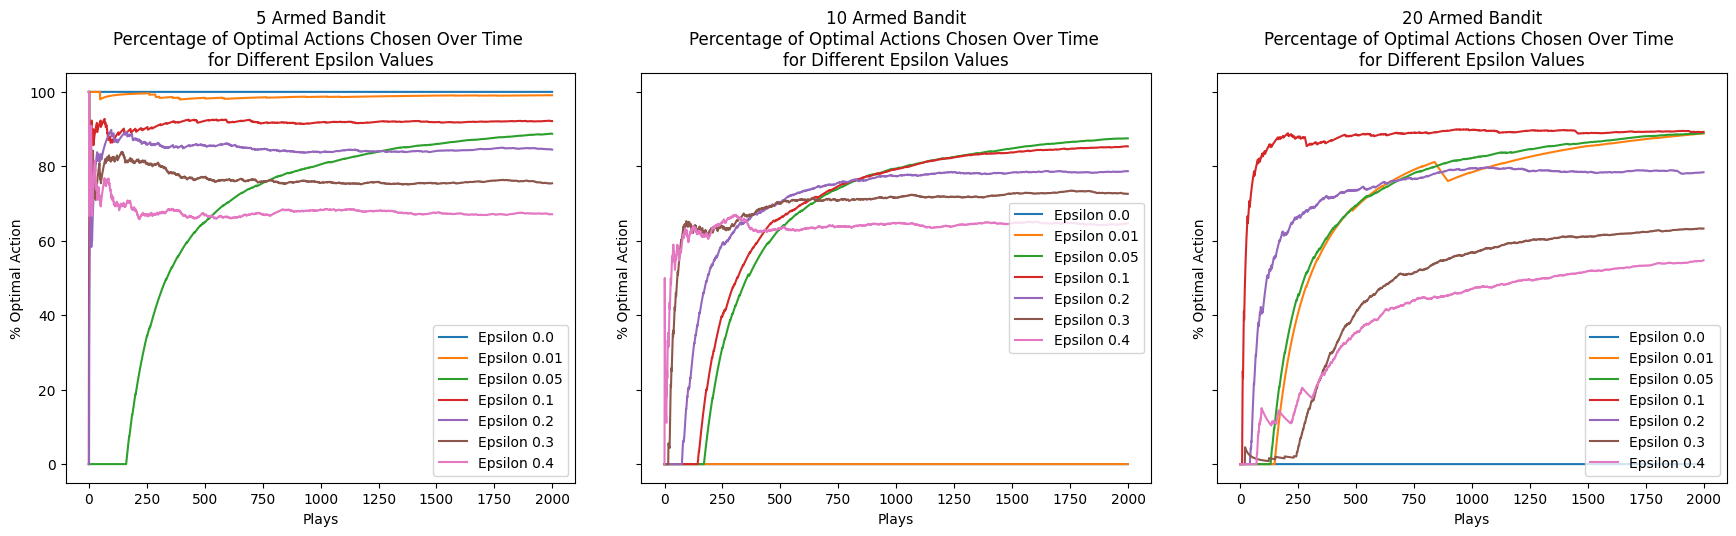


Final Percentages of Optimal Actions Taken:

                 Epsilon 0.0  Epsilon 0.01  Epsilon 0.05  Epsilon 0.1  Epsilon 0.2  Epsilon 0.3  Epsilon 0.4
5 Armed Bandit    100.000000     99.100000         88.75    92.150000    84.500000        75.45    67.150000
10 Armed Bandit     0.000000      0.000000         87.50    85.350000    78.700000        72.60    64.650000
20 Armed Bandit     0.000000     88.800000         88.95    89.250000    78.400000        63.30    54.750000
Average            33.333333     62.633333         88.40    88.916667    80.533333        70.45    62.183333


In [ ]:
# To further evaluate the performance of our algorithm, we can plot a graph of the percentage of times that the optimal was action chosen in each play

# I'll also record the final percentage of optimal actions chosen, using an array and then display this as a table using pandas:
# Let's begin by importing the pandas library
import pandas as pd

# Then initialise an empty list to store the final percentage of optimal actions chosen for each bandit and epsilon setting
final_optimal_action_percentages = []

# Set up the figure and axes for plotting, with 3 subplots in a row, each sharing the y-axis
fig, axs = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Give titles for each subplot, for each of the bandit problems
titles = ['5 Armed Bandit', '10 Armed Bandit', '20 Armed Bandit']

# Contextual information to be added to each subplot title
graph_context = "\nPercentage of Optimal Actions Chosen Over Time \nfor Different Epsilon Values"

# Loop through each set of EpsilonGreedy instances (each corresponding to a different n-armed bandit problem)
for ax, instance_set, title in zip(axs, eg_instances, titles):
    final_percentages_for_current_bandit = []  # Temporary list to store final percentages for the current bandit
    for i, eg in enumerate(instance_set):
        optimal_selection_percentage_per_playstep = []  # Store percentages of optimal action selections per play
        # Calculate the percentage of times the optimal action was chosen in each play
        for selections in eg.selections_history: # selection_history = [] => selection_history = [[1, 0, 0 ,0, 0]] => [[1, 0, 0 ,0, 0], [[2, 0, 0 ,0, 0]]]
            optimal_selection_percentage = selections[np.argmax(eg.expectedValues)] / np.sum(selections) * 100
            optimal_selection_percentage_per_playstep.append(optimal_selection_percentage)
        # Plot the percentage of optimal selections over time for the current epsilon setting
        ax.plot(optimal_selection_percentage_per_playstep, label=f'Epsilon {epsilons[i]}')
        # Store the final percentage of the current epsilon setting for later analysis
        final_percentages_for_current_bandit.append(optimal_selection_percentage_per_playstep[-1])

    # Append the collected final percentages for the current bandit setup to the overall list
    final_optimal_action_percentages.append(final_percentages_for_current_bandit)

    # Customize the subplot for the current n-armed bandit problem
    ax.set_title(title + graph_context)
    ax.set_xlabel('Plays')
    ax.set_ylabel('% Optimal Action')
    ax.legend()

# Adjust the layout of the subplots for better presentation
plt.tight_layout(pad=3)
# Display the plot
plt.show()

# Convert the list of final optimal action percentages into a pandas DataFrame for easier analysis and display
df_final_results = pd.DataFrame(final_optimal_action_percentages, columns=[f'Epsilon {eps}' for eps in epsilons], index=titles)

# We can also calculate the mean percentage of the optimal action across different n-armed bandits for each epsilon value
average_optimal_actions = df_final_results.mean(axis=0)

# Then append it to our dataframe with index 'average'
df_final_results.loc['Average'] = average_optimal_actions

# Print the DataFrame to show the final percentages of optimal actions taken in a nicely formatted table
print("\nFinal Percentages of Optimal Actions Taken:\n")
print(df_final_results.to_string())



Results from this run / instance of the entire simulation suggest that the optimal solution for the epsilon greedy algorithm for any value of n is to set the epsilon value (probability of random exploration) at 0.1 if we run. However, in the case that n is small (5 or less) it may be better to use greedy-search, rather than epsilon-greedy search.

We believe that this is the case because the probability of randomly choosing the optimum action is 1/n and subsequently, when n is small,  there is a higher chance that the greedy algorithm can efficiently discover the optimum action.

## Variability across multiple runs:

Whilst completing this assignment, it was noted by the group that results are not consistent between simulations, and that the performance of the algorithm can vary widely, just by the chance that a given agent may randomly choose the best action at an earlier stage of it's exploration / exploitation. To demonstrate this, we can define our above operations as a single function, and call this multiple times:

In [ ]:
def rerun_simulation():
    # Set the total number of plays or trials for the simulation
    totalPlays = 2000
    # Define a list of epsilon values for exploring/exploiting in the Epsilon-Greedy strategy
    epsilons = [0.0, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4]

    # Create instances of the EpsilonGreedy class for different n-armed bandit problems with various epsilon values
    n5_eg_instances = [EpsilonGreedy(n5, n5_std, eps) for eps in epsilons]
    n10_eg_instances = [EpsilonGreedy(n10, n10_std, eps) for eps in epsilons]
    n20_eg_instances = [EpsilonGreedy(n20, n20_std, eps) for eps in epsilons]

    # Group the instances by the number of arms (5, 10, 20) for collective processing
    eg_instances = [n5_eg_instances, n10_eg_instances, n20_eg_instances]

    # Run the simulation for each set of instances
    for instance_set in eg_instances:
      for eg in instance_set:
          for i in range(totalPlays):
              # Select an arm based on the Epsilon-Greedy strategy, obtain reward, and update the state
              chosen_arm = eg.select_arm()
              reward = eg.get_reward(chosen_arm)
              eg.update(chosen_arm, reward)

    # Setup the plotting environment for the average rewards over time
    fig, axs = plt.subplots(1, 3, figsize=(18, 6), sharey=True)
    titles = ['5 Armed Bandit', '10 Armed Bandit', '20 Armed Bandit']
    graph_context = "\nAverage Rewards Over Time \nfor Different Epsilon Values"

    # Plot the average rewards for each epsilon value across different n-armed bandit configurations
    for ax, instance_set, title in zip(axs, eg_instances, titles):
        for i, eg in enumerate(instance_set):
            ax.plot(eg.average_rewards, label=f'Epsilon {epsilons[i]}')
        ax.set_title(title + graph_context)
        ax.set_xlabel('Plays')
        ax.set_ylabel('Average Reward')
        ax.legend()

    plt.tight_layout(pad=3)
    plt.show()

    # Initialize an empty list to store the final percentages of optimal actions selected
    final_optimal_action_percentages = []

    # Setup the plotting environment for the percentage of optimal actions chosen over time
    fig, axs = plt.subplots(1, 3, figsize=(18, 6), sharey=True)
    graph_context = "\nPercentage of Optimal Actions Chosen Over Time \nfor Different Epsilon Values"

    for ax, instance_set, title in zip(axs, eg_instances, titles):
        final_percentages_for_current_bandit = []
        for i, eg in enumerate(instance_set):
            # Calculate and plot the percentage of times the optimal action was chosen for each epsilon
            optimal_selection_percentage_per_playstep = []
            for selections in eg.selections_history:
                optimal_selection_percentage = selections[np.argmax(eg.expectedValues)] / np.sum(selections) * 100
                optimal_selection_percentage_per_playstep.append(optimal_selection_percentage)
            ax.plot(optimal_selection_percentage_per_playstep, label=f'Epsilon {epsilons[i]}')
            # Store the final percentage of optimal actions chosen for later analysis
            final_percentages_for_current_bandit.append(optimal_selection_percentage_per_playstep[-1])

        # Append the final percentages for this bandit configuration to the overall list
        final_optimal_action_percentages.append(final_percentages_for_current_bandit)

        # Configure the plot settings for the current n-armed bandit simulation
        ax.set_title(title + graph_context)
        ax.set_xlabel('Plays')
        ax.set_ylabel('% Optimal Action')
        ax.legend()

    plt.tight_layout(pad=3)
    plt.show()

    # Convert the collected final optimal action percentages into a DataFrame for analysis
    df_final_results = pd.DataFrame(final_optimal_action_percentages, columns=[f'Epsilon {eps}' for eps in epsilons], index=titles)

    # Calculate the mean percentage of the optimal action chosen across different n-armed bandits for each epsilon
    average_optimal_actions = df_final_results.mean(axis=0)

    # Append the calculated averages as a new row to the DataFrame
    df_final_results.loc['Average'] = average_optimal_actions

    # Display the final DataFrame, including the averages
    print("\nFinal Percentages of Optimal Actions Taken:\n")
    print(df_final_results.to_string())


## Second Instance of Simulation

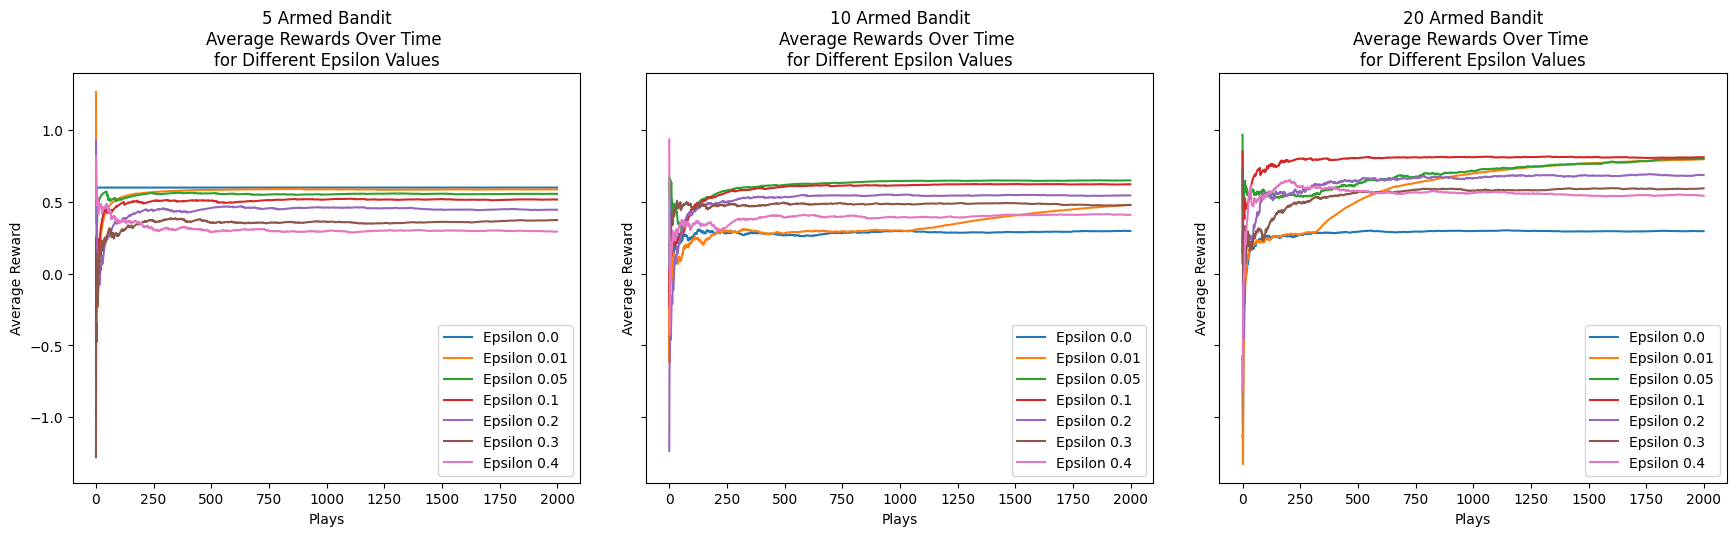

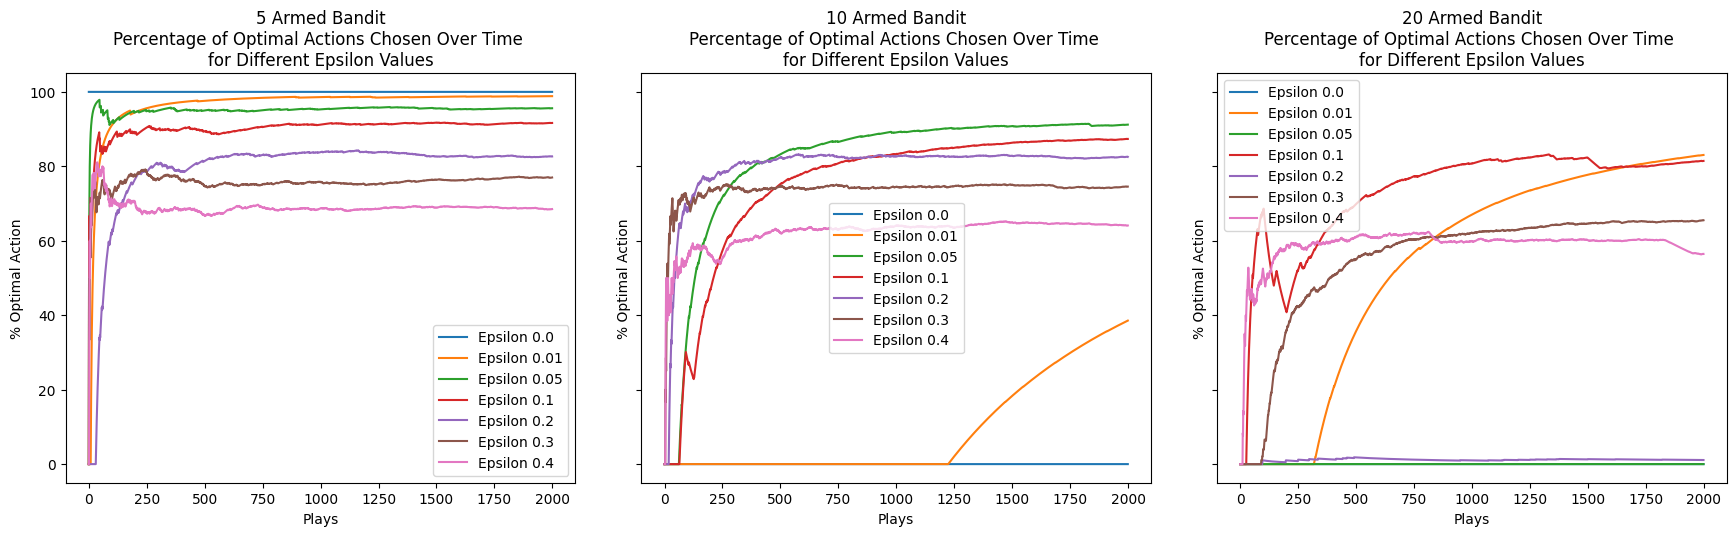


Final Percentages of Optimal Actions Taken:

                 Epsilon 0.0  Epsilon 0.01  Epsilon 0.05  Epsilon 0.1  Epsilon 0.2  Epsilon 0.3  Epsilon 0.4
5 Armed Bandit    100.000000     98.850000     95.600000    91.650000    82.650000        77.00    68.500000
10 Armed Bandit     0.000000     38.550000     91.200000    87.350000    82.550000        74.55    64.100000
20 Armed Bandit     0.000000     83.050000      0.000000    81.450000     1.100000        65.50    56.450000
Average            33.333333     73.483333     62.266667    86.816667    55.433333        72.35    63.016667


In [ ]:
rerun_simulation()

When we run the simulation for a second time, it appears that our optimum solution for any given value of n is to use an epsilon value of 0.1, in line with our previous results. However, we can also see that the best solution for the 20 armed bandit wasin this case an epsilon value of 0.01, which involves reducing the frequency of expected exploration by a factor of 10 and yet outperforms all other epsilon values.

# Third Instance of the simulation

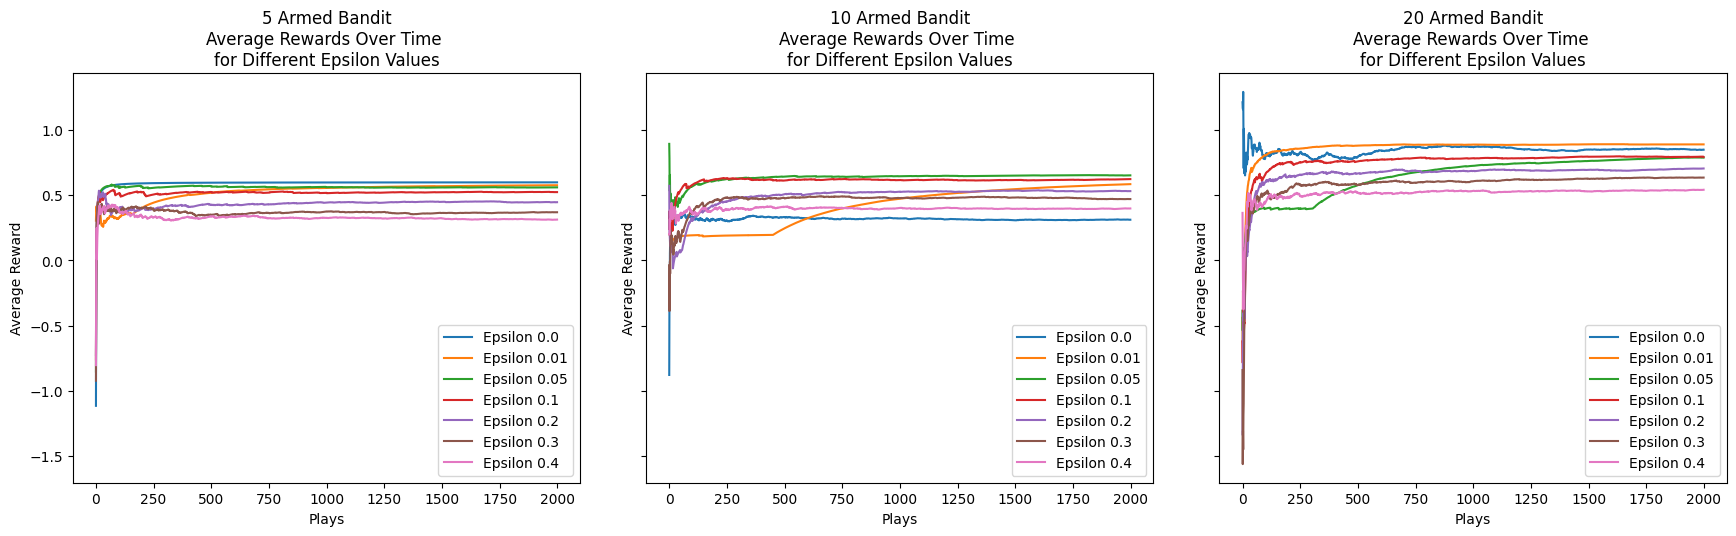

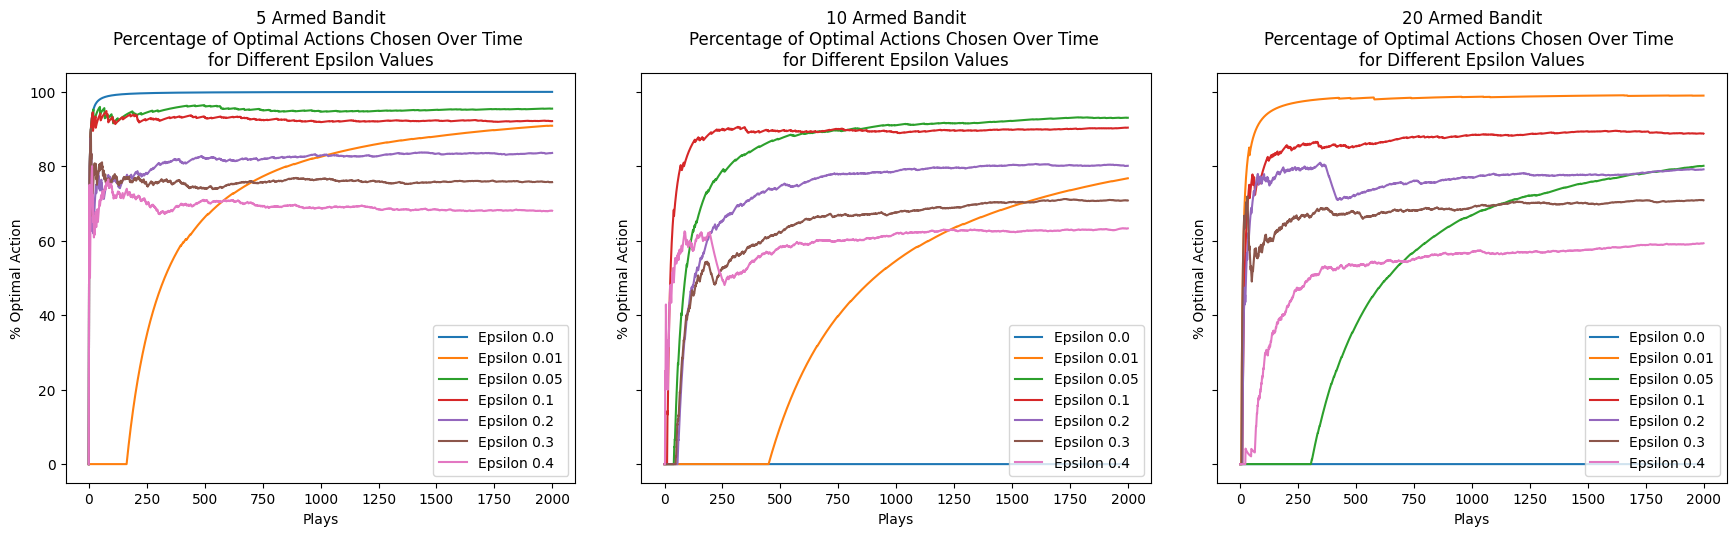


Final Percentages of Optimal Actions Taken:

                 Epsilon 0.0  Epsilon 0.01  Epsilon 0.05  Epsilon 0.1  Epsilon 0.2  Epsilon 0.3  Epsilon 0.4
5 Armed Bandit     99.950000         90.85     95.450000        92.10    83.550000        75.70        68.05
10 Armed Bandit     0.000000         76.75     93.000000        90.35    80.100000        70.80        63.30
20 Armed Bandit     0.000000         98.95     80.100000        88.75    79.150000        70.85        59.30
Average            33.316667         88.85     89.516667        90.40    80.933333        72.45        63.55


In [ ]:
rerun_simulation()

Again we see that the optimum average performance across all values of n is found when epsilon is set to 0.1. However, we again see the case that an epsilon value of 0.01 has the best performance on the 20 armed bandit problem.

## Fourth Instance of Simulation

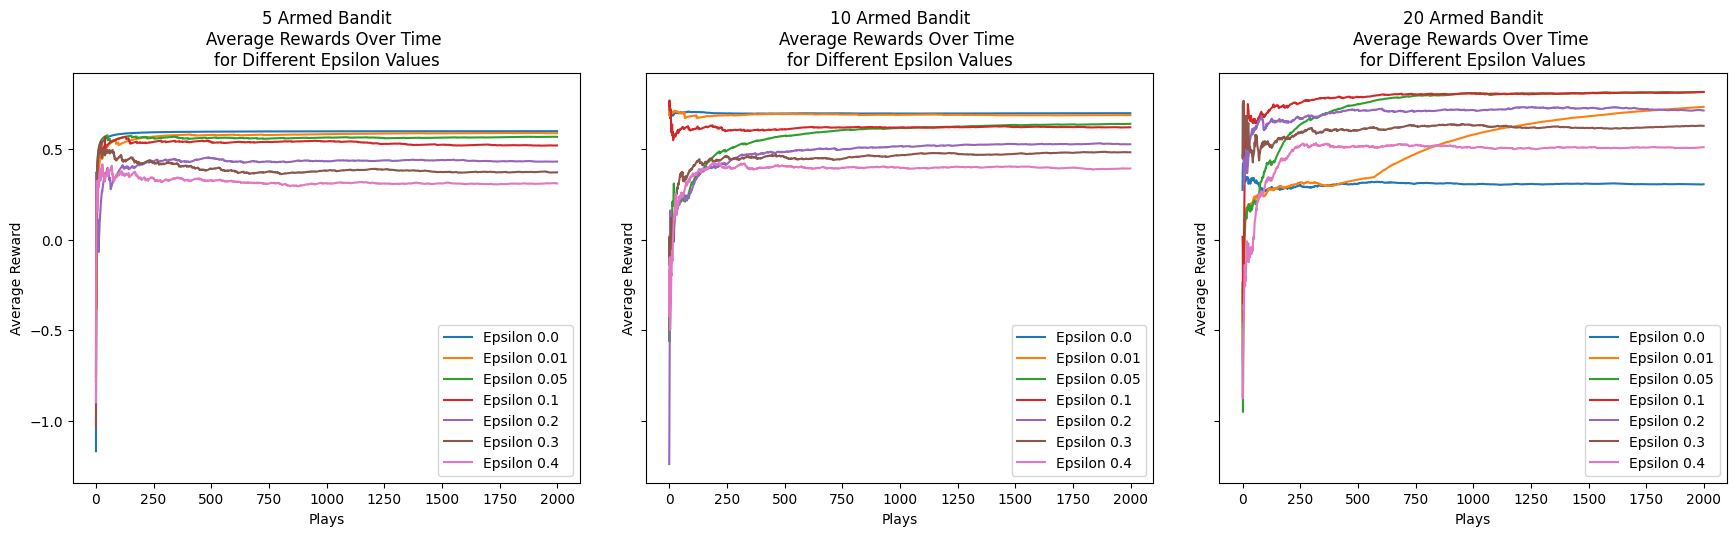

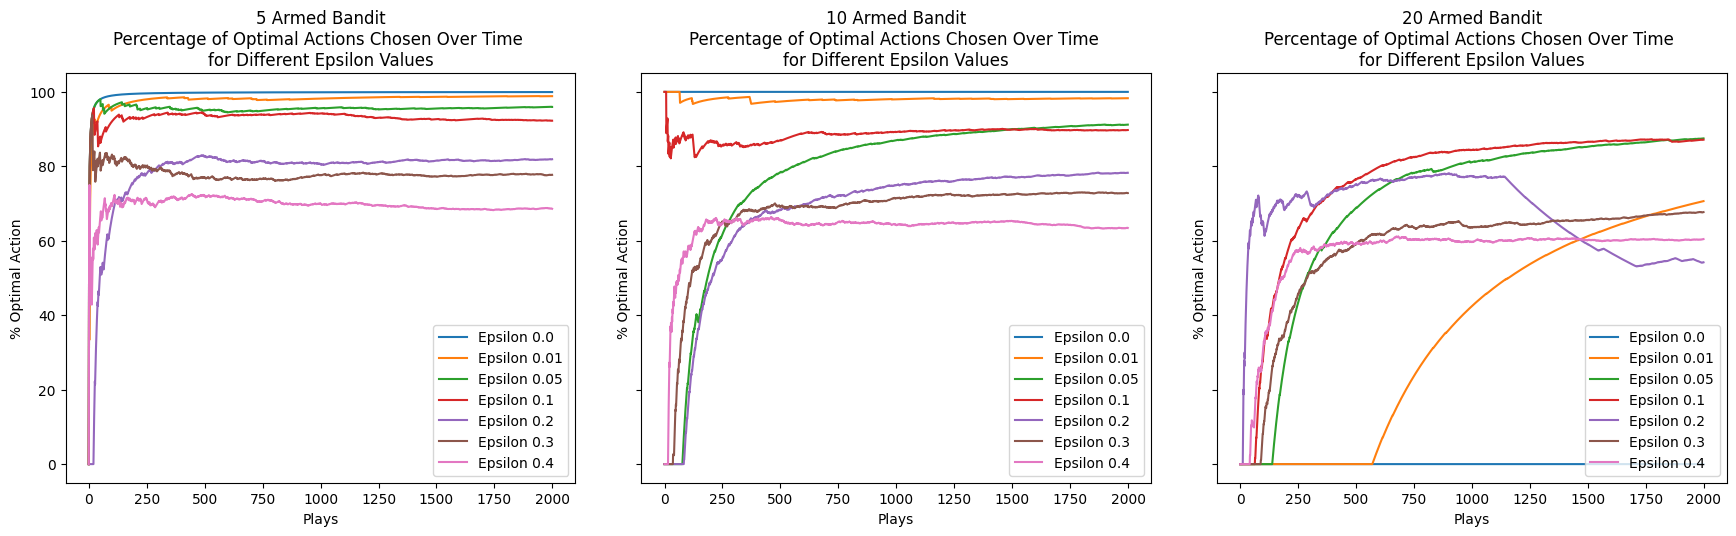


Final Percentages of Optimal Actions Taken:

                 Epsilon 0.0  Epsilon 0.01  Epsilon 0.05  Epsilon 0.1  Epsilon 0.2  Epsilon 0.3  Epsilon 0.4
5 Armed Bandit         99.95     98.850000         95.95    92.250000        81.90    77.700000    68.600000
10 Armed Bandit       100.00     98.300000         91.20    89.750000        78.25    72.800000    63.450000
20 Armed Bandit         0.00     70.650000         87.50    87.150000        54.20    67.700000    60.450000
Average                66.65     89.266667         91.55    89.716667        71.45    72.733333    64.166667


In [ ]:
rerun_simulation()

Interestingly, we see in this run of the experiment that the greedy algorithm, with an epsilon value of 0, performs best on both the 5 armed and the 10 armed bandit problems, and that on average across all bandits an epsilon value of 0.05 gives the highest percentage of optimal selection.